## Identifying Successful Film Trends and Opportunities for Microsoft Movie Studio


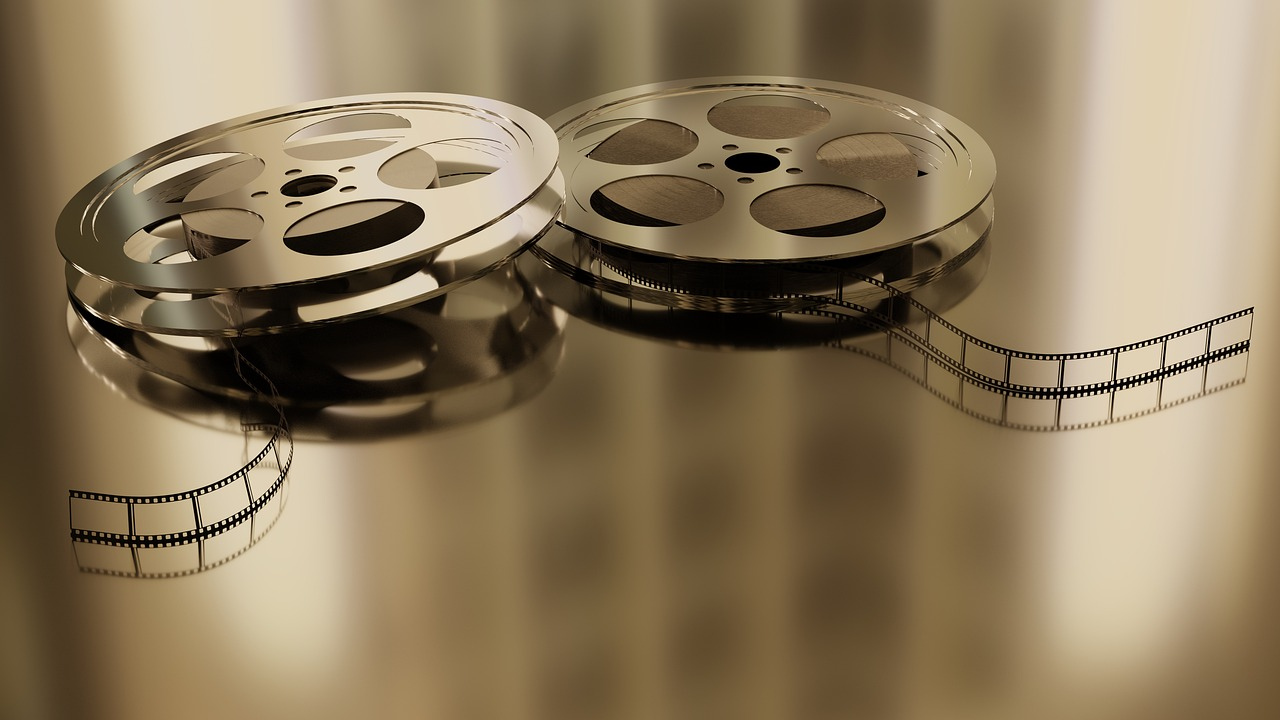

In [11]:
from IPython.display import Image
Image('/Users/zenah/Desktop/PROJECTS/first_project/film.jpg')

#### Business Statement
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

#### Objective
Microsoft Movie Studio will be a new revenue stream for Microsoft. A successful movie studio can improve brand recognition which in turn will help with the sales of already existing microsoft products. I'll be performing data analysis and exploration techniques using pandas. The goal is to identify the key factors contributing to the success of movies and provide  insights that inform on the content strategy of Microsoft's new movie studio. Some of the questions we'll try to answer to guide our decisions are;
      
 1. Which are the most profitable genres in the film industry?
 2. What is the distribution of movie by studio?
 3. Which movies have the highest popularity over the years?
 4. Which companies make the highest revenues?

 
       

#### Datasets


For this project I will work with two datasets to try and achieve the objective. The first dataset(hype) is pretty clean with no missing values which gives a nice impression of the data. This data ranges from 1930 to 2020. The second dataset(staple) however has a few missing values on the studio and domestic_gross columns with data ranging from 2010 to 2018.

In [12]:
#Import the necessary libraries
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 



In [13]:
#Loading data to pandas dataframe and exploring head.
hype = pd.read_csv('/Users/zenah/Desktop/PROJECTS/first_project/Data/tmdb.movies.csv', index_col=0)
hype.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [14]:
#Data Insights
print(hype.shape)

print(hype.dtypes)

(26517, 9)
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object


In [15]:
#Checking for any null values
hype.isnull().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [16]:
#Finding the range of our dataset
print(hype['release_date'].min())
print(hype['release_date'].max())

1930-04-29
2020-12-25


In [17]:
#Loading the second dataset
staple = pd.read_csv('/Users/zenah/Desktop/PROJECTS/first_project/Data/bom.movie_gross.csv')
staple.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [18]:
#Data Insights
print(staple.shape)

print(staple.dtypes)

(3387, 5)
title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object


In [19]:
#Checking for nulls
staple.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [20]:
#Finding the range of our dataset
print(staple['year'].min())
print(staple['year'].max())

2010
2018


### Performing Data Cleaning on the 'staple' dataset
After identifying and noting the columns with some missing values and considering the size of the dataset I decided to go with the latter option dropping the rows with misssing values for 'studio' and 'domestic_gross' columns. The 'foreign_gross' column however has alot more missing values, so I will just use the domestic gross for my analysis.


In [21]:
#Dropping rows with missing values in studio and domestic_gross columns
staple.dropna(subset = ['studio'], inplace = True)
staple.dropna(subset = ['domestic_gross'], inplace = True)

In [22]:
#Confirmation check that there are no missing values in the specified columns
assert staple['studio'].isna().sum() == 0
assert staple['domestic_gross'].isna().sum() == 0

In [23]:
"""
Now that we don't have missing values that would skew our analysis,
let us check the distribution of movies per studio to know the
companies that are currently dominating the industry.
"""

staple['studio'].value_counts()

studio
IFC           166
Uni.          147
WB            140
Magn.         136
Fox           136
             ... 
TVC             1
E1              1
ELS             1
PalT            1
Synergetic      1
Name: count, Length: 255, dtype: int64

We can also have a visual representation of the above data for better understanding not just some random figures.

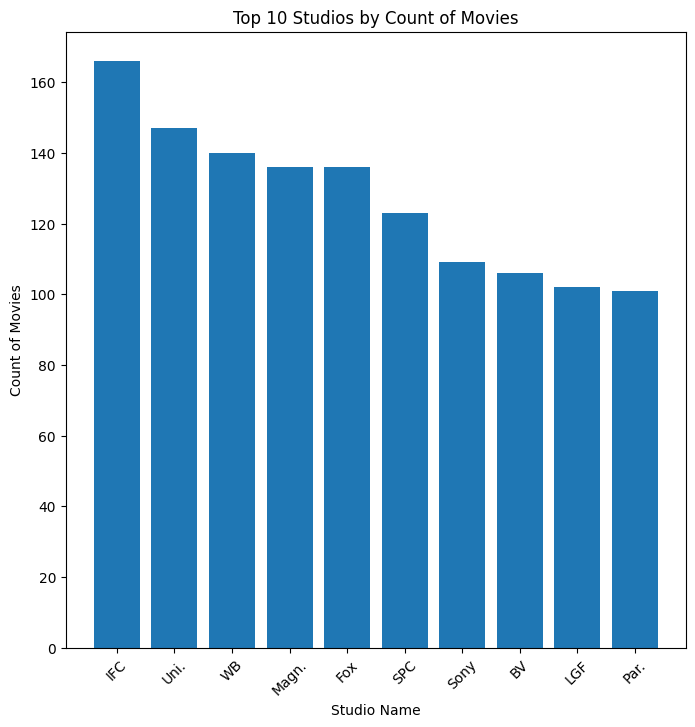

In [24]:
# Top studios based on production
fig, (ax) = plt.subplots(figsize=(8, 8))

# Creating variables 
value_counts = staple["studio"].value_counts()
top_10_counts = value_counts.iloc[:10]

# Plot data
ax.bar(top_10_counts.index, top_10_counts.values)

# Customize appearance
ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Studio Name")
ax.set_ylabel("Count of Movies")
ax.set_title("Top 10 Studios by Count of Movies");

Now let us see the movies that have been profitable over the years based on domestic gross.

In [25]:
#Finding movies with the highest revenue per year
staple = staple.loc[staple.groupby('year')['domestic_gross'].idxmax()]
staple

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000,2011
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
1131,The Hunger Games: Catching Fire,LGF,424700000.0,440300000,2013
1489,American Sniper,WB,350100000.0,197300000,2014
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
3080,Black Panther,BV,700100000.0,646900000,2018


From the result above, it is clear that Buena Vista Movie Studio(BV) has been producing movies that get the highest revenue over the years. The top genres being Superhero film and Science fiction. This is a valuable insight for Microsoft studios if they want to make a film with a greater audience and that will result in high profits.

In [26]:
#The total movie revenue collected per release year.
staple_grouped = staple.groupby('year')['domestic_gross'].sum()
staple_grouped

year
2010    415000000.0
2011    381000000.0
2012    623400000.0
2013    424700000.0
2014    350100000.0
2015    936700000.0
2016    532200000.0
2017    620200000.0
2018    700100000.0
Name: domestic_gross, dtype: float64

The gross income varies over the years but this result shows it could a lucrative business for Microsoft Studios with the minimum profit being 350 million.

In [27]:
# Group movies by studio, find top 10 world-wide
studio_grouped_df = staple.groupby(['studio']).sum()
top_10_studios = studio_grouped_df.nlargest(10, 'domestic_gross')
top_10_studios

,title,domestic_gross,foreign_gross,year
studio,,,,
BV,Toy Story 3Marvel's The AvengersStar Wars: The...,3.827600e+09,"6520000008955000001,131.6523900000712400000646...",12088
WB,Harry Potter and the Deathly Hallows Part 2Ame...,7.311000e+08,960500000197300000,4025
LGF,The Hunger Games: Catching Fire,4.247000e+08,440300000,2013


In terms of domestic gross BV studios come at the top. From the previous insight on the number of movies produced, we can conclude that production of many movies by a company does not correlate to making the highest revenue.

In [28]:
# Create a dataframe of movies produced by BV studios, sorted by domestic_gross in descending order
staple = staple[staple['studio']=='BV'].sort_values('domestic_gross', ascending=False)
staple.head(20)

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
0,Toy Story 3,BV,415000000.0,652000000,2010


BV Studio is the top perfoming studio in terms of revenue. An analysis on the genre that Bv studio produces oftenly would be crucial in determining the genre that microsoft should focus on to become successful. In this case apart from sci-fi and superhero film there is also a number of animations as a top genre.

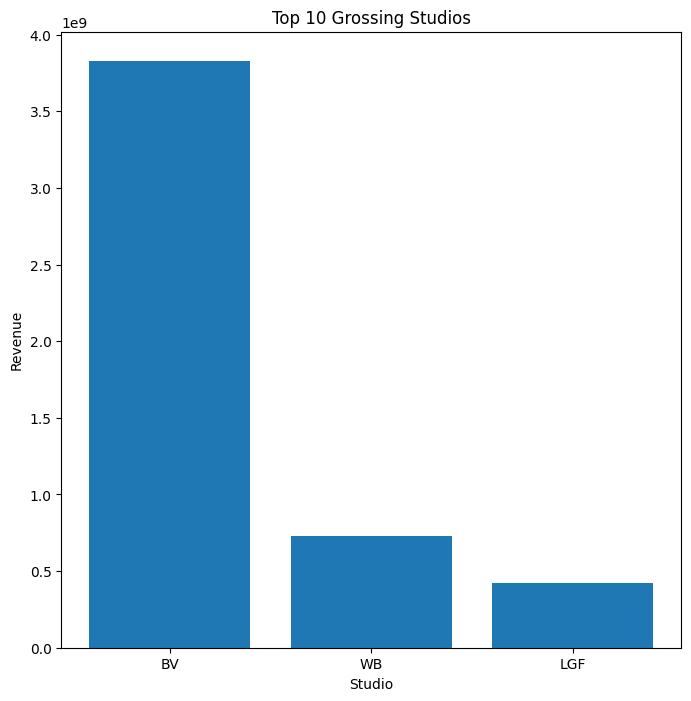

In [29]:
# show the top ten prominent studios on revenue
fig = plt.figure(figsize = (8, 8))
plt.bar(top_10_studios.index, top_10_studios['domestic_gross'])

# Set axes titles
plt.title('Top 10 Grossing Studios')
plt.xlabel('Studio')
plt.ylabel('Revenue');

### Analysis of 'hype' dataset
Since this dataset has no missing values we will begin with checking if there is any duplicate rows

In [30]:
dup_data = hype.duplicated().any()
print("Are there any duplicated values?", dup_data)

Are there any duplicated values? True


In [31]:
hype = hype.drop_duplicates()
hype

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


Now that we have removed duplicates we can work on the clean dataset

In [32]:
# Descriptive statistics of our cleaned dataset
hype.describe()

,id,popularity,vote_average,vote_count
count,25497.000000,25497.000000,25497.000000,25497.000000
mean,294203.960505,3.043279,5.979331,178.795780
std,154690.249660,4.261045,1.866094,914.150311
min,27.000000,0.600000,0.000000,1.000000
25%,154770.000000,0.600000,5.000000,1.000000
50%,307125.000000,1.321000,6.000000,5.000000
75%,420707.000000,3.490000,7.000000,25.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [33]:
# Creating a Year feature for easier analysis
pd.to_datetime(hype['release_date'])

#Reassigning to original dataframe
hype['year'] = pd.to_datetime(hype['release_date'])
hype['year']

0       2010-11-19
1       2010-03-26
2       2010-05-07
3       1995-11-22
4       2010-07-16
           ...    
26512   2018-10-13
26513   2018-05-01
26514   2018-10-01
26515   2018-06-22
26516   2018-10-05
Name: year, Length: 25497, dtype: datetime64[ns]

To try and figure out one of our objective questions, which movie has the highest popularity over the years?

In [34]:
def find_popularity(year_1 = 0 , year_2 = 0) :
    sorted_popularity = hype.sort_values(by = 'popularity',ascending= False)
    if year_2 == 0 :
        year_2 = year_1
    if year_1 != 0 :
        sorted_popularity.query('year >= @year_1 and year <= @year_2',inplace = True)
    plt.subplots(figsize=(10,8))
    plt.gca().invert_yaxis()
    plt.barh(sorted_popularity['title'].head(10),sorted_popularity['popularity'].head(10))

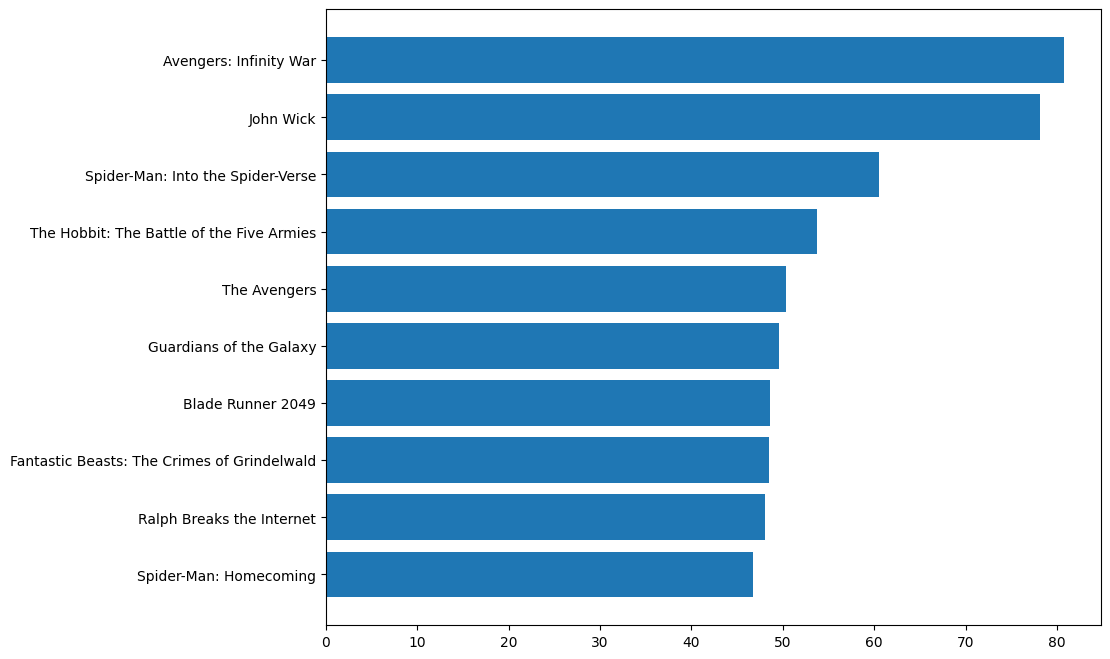

In [35]:
find_popularity()

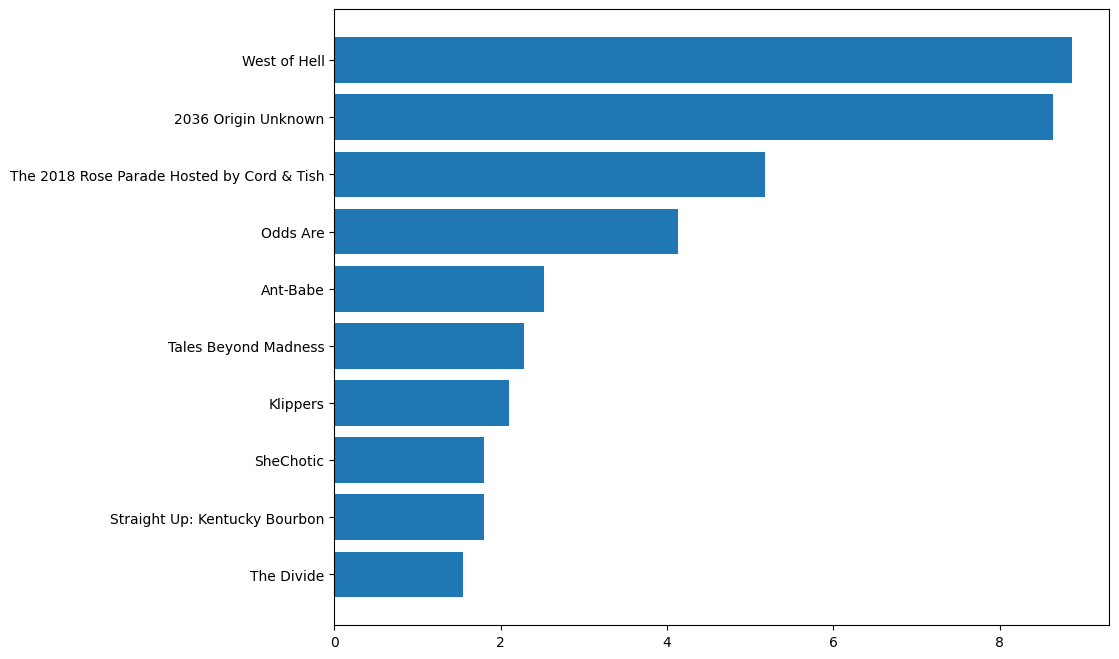

In [36]:
# For the year 2018
find_popularity(2018) 

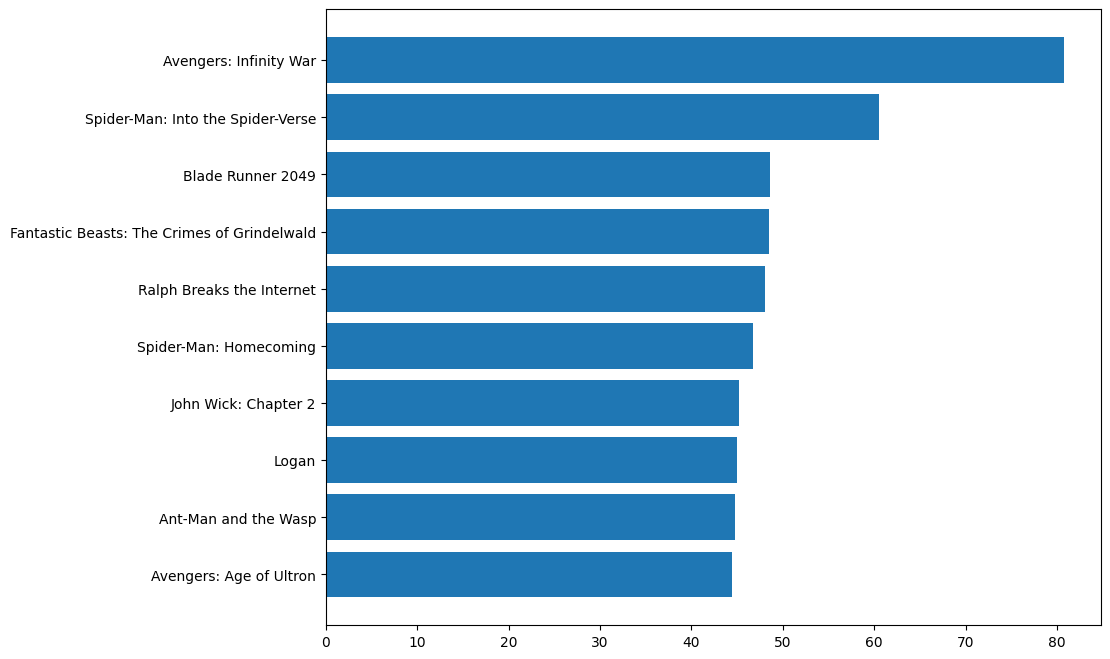

In [37]:
# For the 2015 <= year <= 2020
find_popularity(2015,2020)

The movie with the highest popularity overall is 'Avengers: Infinity war'. For the year 2018, the most popular movie was 'West of Hell' followed by '2036 Origin Unknown'. Between 2015 and 2020, the most popular movies were 'Avengers: Infinity war' followed by 'Spiderman: Into the Spider-Verse'. For sure, 'Avengers: Infinity war' is the Greatest of All Time. But an interesting fact is that among the 10 top popular movies most of them are sci-fi or superhero films.

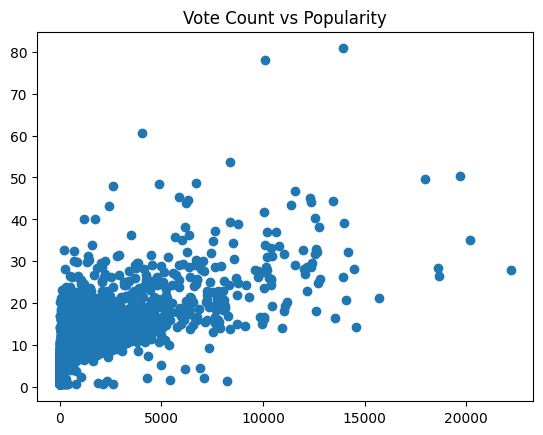

In [38]:
#How are vote count and popularity related?
plt.scatter(hype['vote_count'],hype['popularity'])
plt.title('Vote Count vs Popularity');

The scatter plot indicates a positive correlation between the vote count and popularity of movies. Movies with higher vote counts tend to suggest that popularity. However, there are also some outliers where movies with relatively low vote counts achieved high popularity, and vice versa. The relationship is not perfectly linear, but there is a general trend.

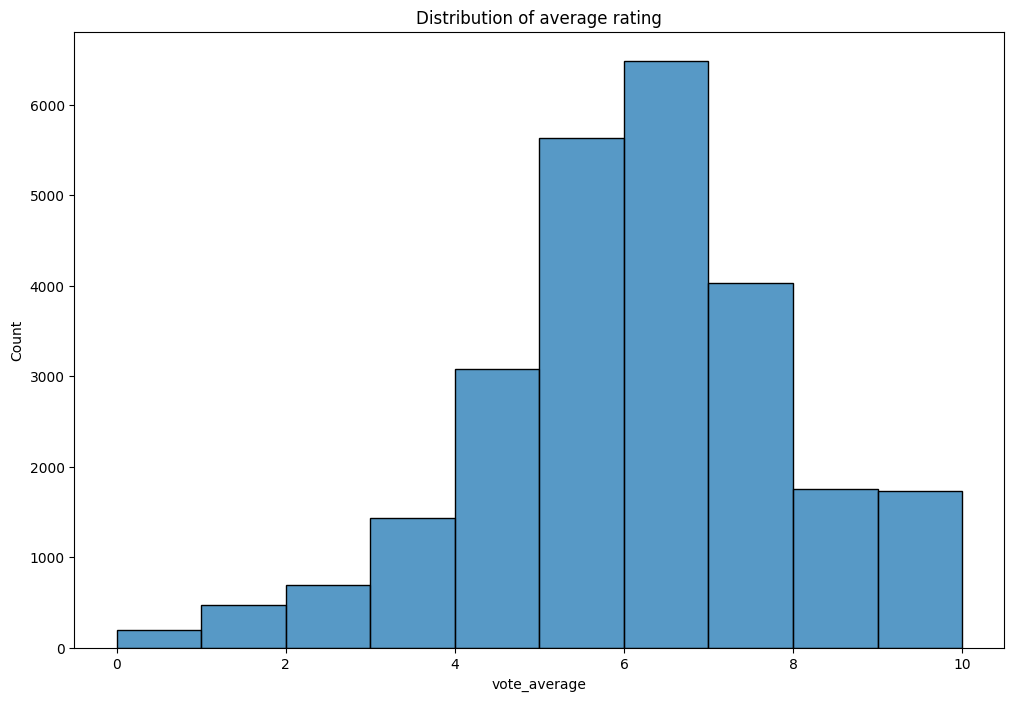

In [39]:
#histogram showing the average rating distribution
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(hype['vote_average'], bins= 10, ax=ax)
ax.set_title('Distribution of average rating');

Most movies have an average rating of around 7. Generally, the distribution is negatively skewed. There are a few movies with a rating of less than 4.